In [ ]:
from google.colab import files

uploaded = files.upload()  # Opens file picker to upload files

# Show uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")

Saving website anamolies dataset - Midterm_53_group.csv to website anamolies dataset - Midterm_53_group.csv
Uploaded file: website anamolies dataset - Midterm_53_group.csv


In [ ]:
from google.colab import files

uploaded = files.upload()  # Opens file picker to upload files

# Show uploaded files
for filename in uploaded.keys():
    print(f"Uploaded file: {filename}")


Saving fraud_website_dataset - fraud_website_dataset.csv.csv to fraud_website_dataset - fraud_website_dataset.csv.csv
Uploaded file: fraud_website_dataset - fraud_website_dataset.csv.csv


In [ ]:
import os

# List files in Colab directory
print(os.listdir())

['.config', 'fraud_website_dataset - fraud_website_dataset.csv.csv', 'website anamolies dataset - Midterm_53_group.csv', 'sample_data']


In [ ]:
import os

# Rename files for easier access
os.rename("fraud_website_dataset - fraud_website_dataset.csv.csv", "fraud_dataset.csv")
os.rename("website anamolies dataset - Midterm_53_group.csv", "anomalies_dataset.csv")

print("Files renamed successfully!")

Files renamed successfully!


In [ ]:
import pandas as pd

# Load datasets
df1 = pd.read_csv("fraud_dataset.csv")  # Renamed fraud website dataset
df2 = pd.read_csv("anomalies_dataset.csv")  # Renamed anomalies dataset

# Display basic info about both datasets
print("Fraud Dataset:")
print(df1.info())
print(df1.head())

print("\nAnomalies Dataset:")
print(df2.info())
print(df2.head())

Fraud Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   URL_Length              5000 non-null   int64  
 1   Num_Dots                5000 non-null   int64  
 2   Has_At_Symbol           5000 non-null   int64  
 3   Prefix_Suffix_Domain    5000 non-null   int64  
 4   Subdomain_Level         5000 non-null   int64  
 5   HTTPS_Token             5000 non-null   int64  
 6   Request_URL_Percentage  5000 non-null   float64
 7   Anchor_URL_Percentage   5000 non-null   float64
 8   Fraudulent              5000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 351.7 KB
None
   URL_Length  Num_Dots  Has_At_Symbol  Prefix_Suffix_Domain  Subdomain_Level  \
0          95         0              1                     1                1   
1          53         5              1                     0                2

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Convert "Time" to timestamp format
start_time = datetime.now()  # Assume log starts "now" (adjust as needed)
df2["Timestamp"] = df2["Time"].apply(lambda x: start_time + timedelta(seconds=x))

# Drop old "Time" column
df2.drop(columns=["Time"], inplace=True)

# Show updated dataset
print(df2.head())

            Source  No.      Destination Protocol  Length  \
0    192.167.8.166    1  192.167.255.255     NBNS      92   
1    192.167.8.166    2  192.167.255.255     NBNS      92   
2  VMware_8a:5c:e6    3        Broadcast      ARP      60   
3  VMware_8a:5c:e6    4        Broadcast      ARP      60   
4  VMware_8a:5c:e6    5        Broadcast      ARP      60   

                                      Info                  Timestamp  
0                   Name query NB WPAD<00> 2025-03-28 19:14:08.410104  
1                   Name query NB WPAD<00> 2025-03-28 19:14:09.194786  
2  Who has 192.167.7.175? Tell 192.167.0.1 2025-03-28 19:14:09.579164  
3  Who has 192.167.7.175? Tell 192.167.0.1 2025-03-28 19:14:10.578053  
4  Who has 192.167.7.175? Tell 192.167.0.1 2025-03-28 19:14:11.580199  


In [ ]:
# Remove duplicate rows
df2 = df2.drop_duplicates()

print("Duplicate rows removed!")

Duplicate rows removed!


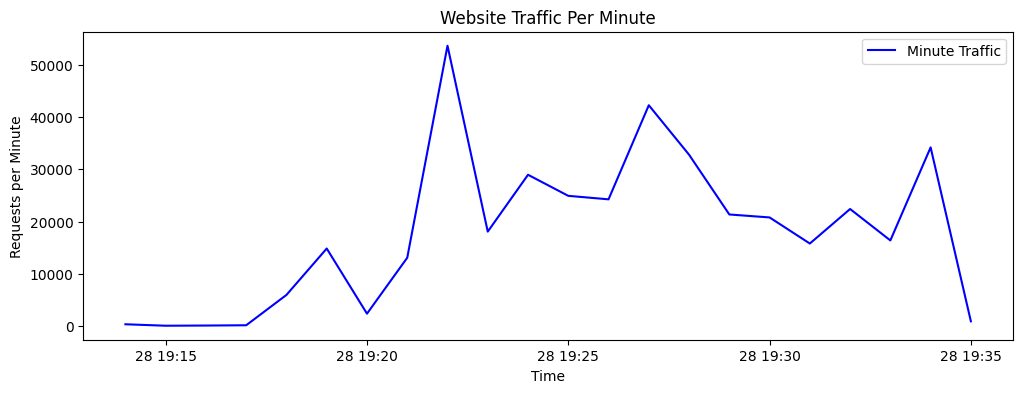

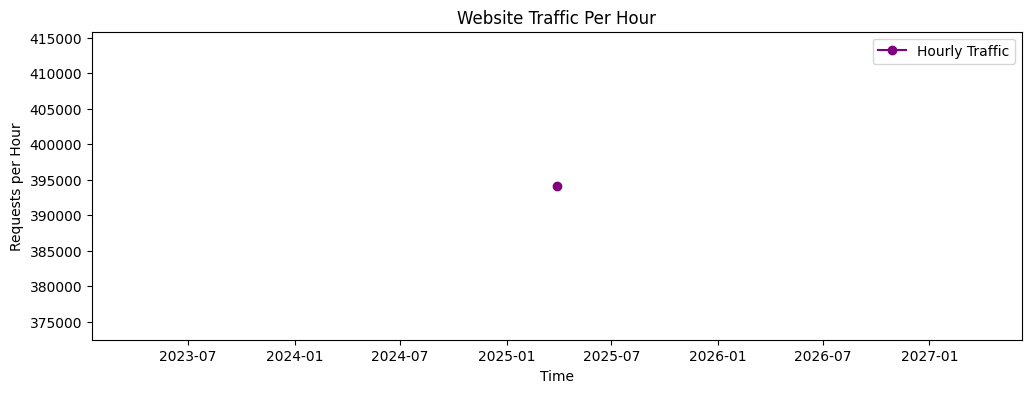

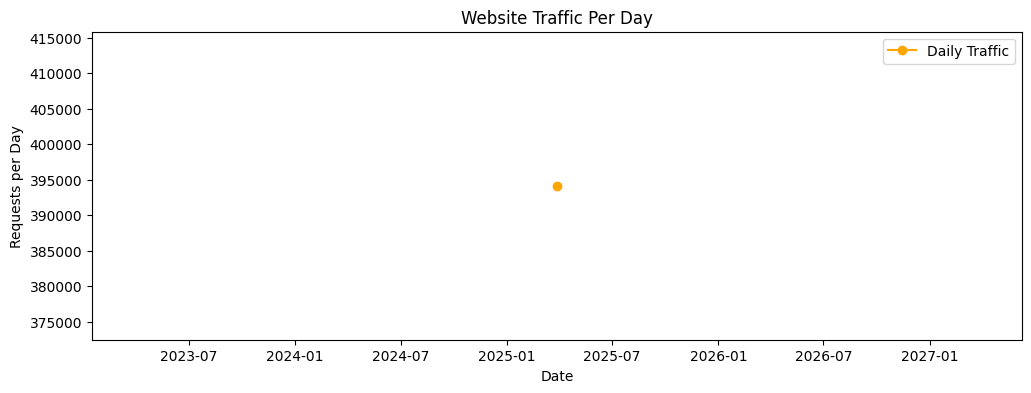

Minute-Level Traffic Data:
             Timestamp  Minute_Request_Count
0 2025-03-28 19:14:00                   403
1 2025-03-28 19:15:00                   126
2 2025-03-28 19:16:00                   161
3 2025-03-28 19:17:00                   215
4 2025-03-28 19:18:00                  6010 

Hourly-Level Traffic Data:
             Timestamp  Hourly_Request_Count
0 2025-03-28 19:00:00                394136 

Daily-Level Traffic Data:
    Timestamp  Daily_Request_Count
0 2025-03-28               394136 



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure Timestamp is in datetime format
df2["Timestamp"] = pd.to_datetime(df2["Timestamp"], errors="coerce")

# Aggregate traffic per minute
traffic_per_minute = df2.groupby(df2["Timestamp"].dt.floor("min")).size().reset_index(name="Minute_Request_Count")

# Aggregate traffic per hour
traffic_per_hour = df2.groupby(df2["Timestamp"].dt.floor("h")).size().reset_index(name="Hourly_Request_Count")

# Aggregate traffic per day
traffic_per_day = df2.groupby(df2["Timestamp"].dt.floor("D")).size().reset_index(name="Daily_Request_Count")

# Plot Traffic Per Minute
plt.figure(figsize=(12, 4))
plt.plot(traffic_per_minute["Timestamp"], traffic_per_minute["Minute_Request_Count"], color="blue", label="Minute Traffic")
plt.xlabel("Time")
plt.ylabel("Requests per Minute")
plt.title("Website Traffic Per Minute")
plt.legend()
plt.show()

# Plot Traffic Per Hour
plt.figure(figsize=(12, 4))
plt.plot(traffic_per_hour["Timestamp"], traffic_per_hour["Hourly_Request_Count"], color="purple", marker='o', linestyle='-', label="Hourly Traffic")
plt.xlabel("Time")
plt.ylabel("Requests per Hour")
plt.title("Website Traffic Per Hour")
plt.legend()
plt.show()

# Plot Traffic Per Day
plt.figure(figsize=(12, 4))
plt.plot(traffic_per_day["Timestamp"], traffic_per_day["Daily_Request_Count"], color="orange", marker='o', linestyle='-', label="Daily Traffic")
plt.xlabel("Date")
plt.ylabel("Requests per Day")
plt.title("Website Traffic Per Day")
plt.legend()
plt.show()

# Display data samples
print("Minute-Level Traffic Data:\n", traffic_per_minute.head(), "\n")
print("Hourly-Level Traffic Data:\n", traffic_per_hour.head(), "\n")
print("Daily-Level Traffic Data:\n", traffic_per_day.head(), "\n")

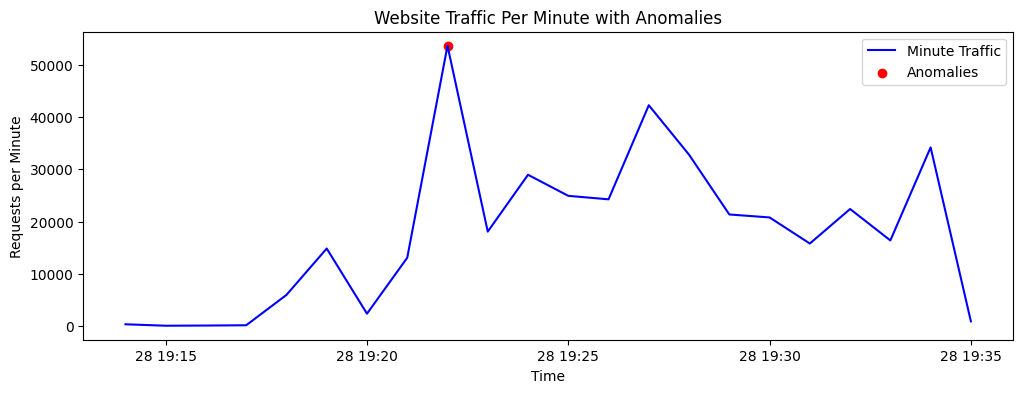

In [ ]:
import numpy as np
import pandas as pd

def detect_anomalies(df):
    mean = df["Minute_Request_Count"].mean()
    std_dev = df["Minute_Request_Count"].std()

    threshold = mean + 2 * std_dev  # Flag values beyond 2 standard deviations
    df["Anomaly"] = df["Minute_Request_Count"] > threshold

    return df

# Compute traffic per minute
traffic_per_minute = df2.groupby(df2["Timestamp"].dt.floor("min")).size().reset_index(name="Minute_Request_Count")

# Apply anomaly detection
traffic_per_minute = detect_anomalies(traffic_per_minute)

# Plot traffic with anomaly markers
plt.figure(figsize=(12, 4))
plt.plot(traffic_per_minute["Timestamp"], traffic_per_minute["Minute_Request_Count"], color="blue", label="Minute Traffic")

# Mark anomalies in red
anomalies = traffic_per_minute[traffic_per_minute["Anomaly"]]
plt.scatter(anomalies["Timestamp"], anomalies["Minute_Request_Count"], color="red", label="Anomalies")

plt.xlabel("Time")
plt.ylabel("Requests per Minute")
plt.title("Website Traffic Per Minute with Anomalies")
plt.legend()
plt.show()

Minute-Level Anomalies:
 Empty DataFrame
Columns: [Timestamp, Minute_Request_Count, Anomaly, Z_Score]
Index: []
Hourly-Level Anomalies:
 Empty DataFrame
Columns: [Timestamp, Hourly_Request_Count, Z_Score, Anomaly]
Index: []
Daily-Level Anomalies:
 Empty DataFrame
Columns: [Timestamp, Daily_Request_Count, Z_Score, Anomaly]
Index: []


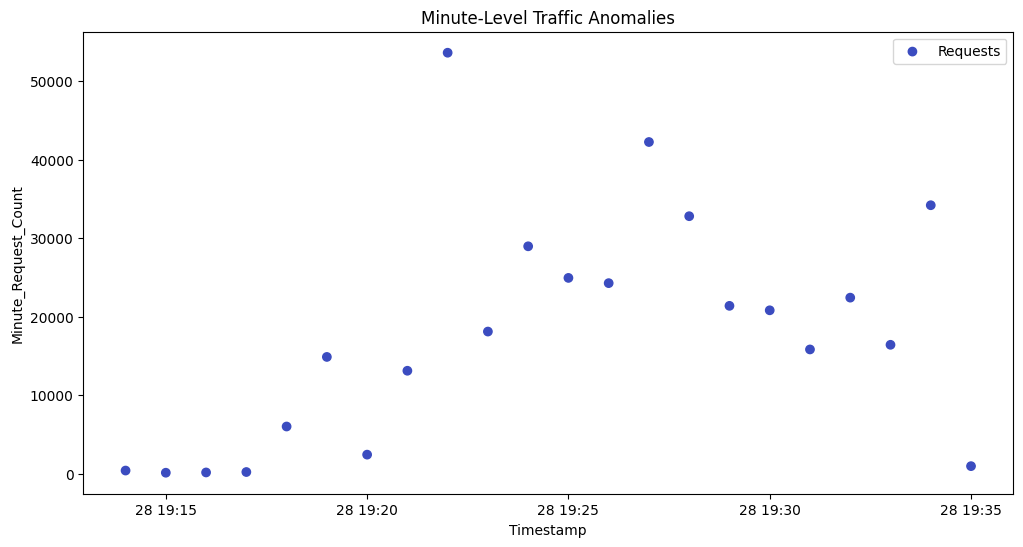

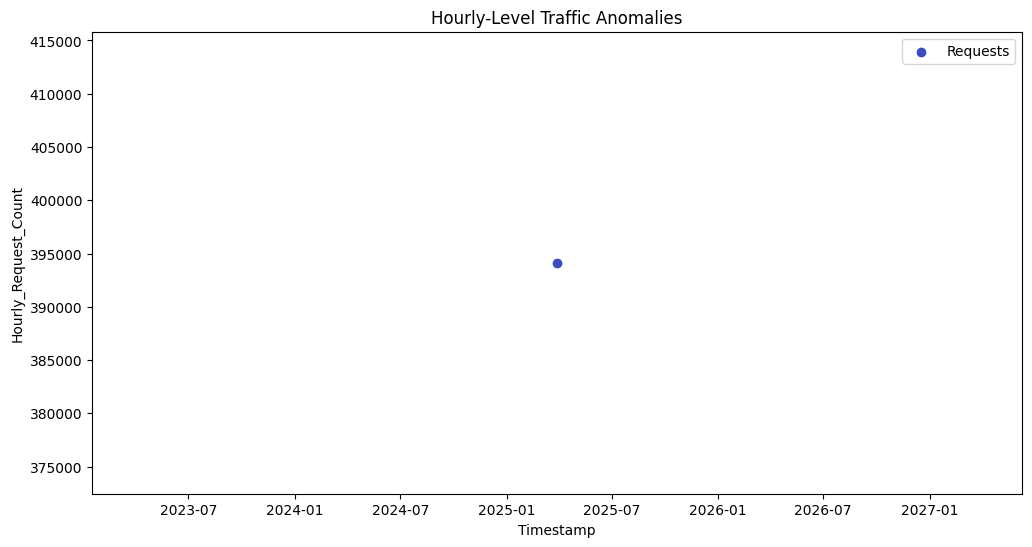

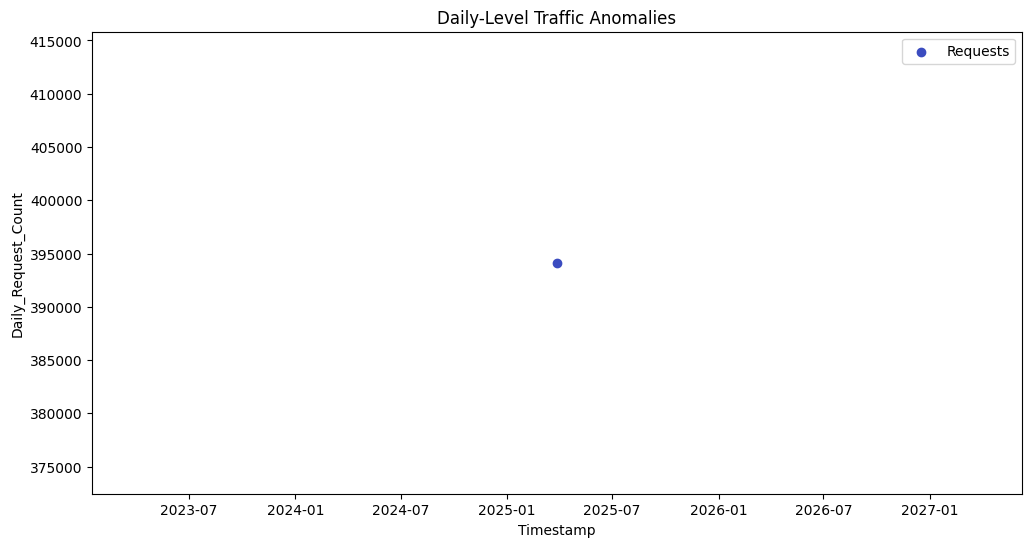

In [ ]:
import numpy as np

# Function to compute anomalies using Z-score
def detect_anomalies(df, count_column):
    df["Z_Score"] = (df[count_column] - df[count_column].mean()) / df[count_column].std()
    df["Anomaly"] = np.abs(df["Z_Score"]) > 3  # Flag anomalies where Z-score > 3
    return df

# Apply anomaly detection
traffic_per_minute = detect_anomalies(traffic_per_minute, "Minute_Request_Count")
traffic_per_hour = detect_anomalies(traffic_per_hour, "Hourly_Request_Count")
traffic_per_day = detect_anomalies(traffic_per_day, "Daily_Request_Count")

# Print anomalies
print("Minute-Level Anomalies:\n", traffic_per_minute[traffic_per_minute["Anomaly"] == True])
print("Hourly-Level Anomalies:\n", traffic_per_hour[traffic_per_hour["Anomaly"] == True])
print("Daily-Level Anomalies:\n", traffic_per_day[traffic_per_day["Anomaly"] == True])

# Visualization of anomalies
def plot_anomalies(df, count_column, title):
    plt.figure(figsize=(12, 6))
    plt.scatter(df["Timestamp"], df[count_column], c=df["Anomaly"], cmap="coolwarm", label="Requests")
    plt.xlabel("Timestamp")
    plt.ylabel(count_column)
    plt.title(title)
    plt.legend()
    plt.show()

# Plot anomalies
plot_anomalies(traffic_per_minute, "Minute_Request_Count", "Minute-Level Traffic Anomalies")
plot_anomalies(traffic_per_hour, "Hourly_Request_Count", "Hourly-Level Traffic Anomalies")
plot_anomalies(traffic_per_day, "Daily_Request_Count", "Daily-Level Traffic Anomalies")

In [ ]:
##svm

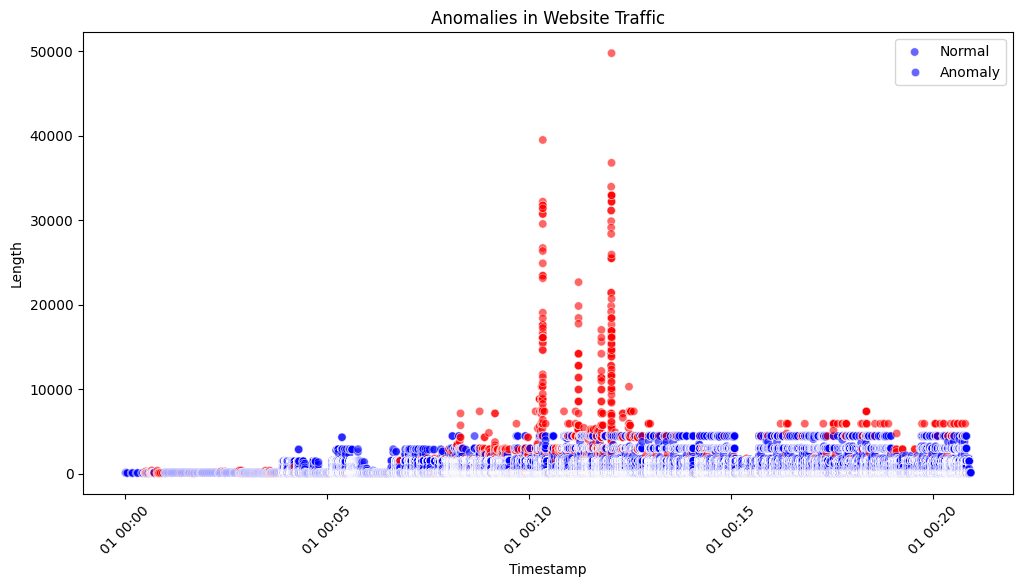

Total Anomalies Detected: 10044


,Time,Source,No.,Destination,Protocol,Length,Info,Timestamp,Anomaly
14,28.757397,356,15,303,9,60,Who is 00:50:56:8a:a0:c6? Tell 00:50:56:8a:a0:c6,1970-01-01 00:00:28.757397,1
15,28.757405,356,16,303,9,60,Who is 00:50:56:8a:a0:c6? Tell 00:50:56:8a:a0:c6,1970-01-01 00:00:28.757405,1
16,29.118205,356,17,303,9,60,Who is 00:50:56:8a:a0:c6? Tell 00:50:56:8a:a0:c6,1970-01-01 00:00:29.118205,1
17,29.120130,356,18,303,9,60,Who is 00:50:56:8a:a0:c6? Tell 00:50:56:8a:a0:c6,1970-01-01 00:00:29.120130,1
18,29.120131,356,19,303,9,60,Who is 00:50:56:8a:a0:c6? Tell 00:50:56:8a:a0:c6,1970-01-01 00:00:29.120131,1


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset (replace with your file path in Colab)
df2 = pd.read_csv("anomalies_dataset.csv")

# Convert Time column to datetime if applicable
df2['Timestamp'] = pd.to_datetime(df2['Time'], unit='s')

# Feature Selection - Keep relevant numerical features
features = ['Length']  # Add more numerical features as needed
if 'Time_Difference' in df2.columns:
    features.append('Time_Difference')

# Encode categorical features (Source, Destination, Protocol)
categorical_cols = ['Source', 'Destination', 'Protocol']
for col in categorical_cols:
    if col in df2.columns:
        df2[col] = LabelEncoder().fit_transform(df2[col])
        features.append(col)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df2[features])

# Train One-Class SVM model
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)  # Adjust nu for sensitivity
svm_model.fit(X)

# Predict anomalies
df2['Anomaly'] = svm_model.predict(X)
df2['Anomaly'] = df2['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Visualize anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(x=df2['Timestamp'], y=df2['Length'], hue=df2['Anomaly'], palette={0: 'blue', 1: 'red'}, alpha=0.6)
plt.xlabel('Timestamp')
plt.ylabel('Length')
plt.title('Anomalies in Website Traffic')
plt.legend(['Normal', 'Anomaly'])
plt.xticks(rotation=45)
plt.show()

# Print anomaly summary
print("Total Anomalies Detected:", df2['Anomaly'].sum())
df2_anomalies = df2[df2['Anomaly'] == 1]
df2_anomalies.head()


In [ ]:
### categorization of outliers from svm

Saved 10044 outliers to outliers_detected.csv
Categorized anomalies saved to categorized_outliers.csv


<ipython-input-12-187a89afae11>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["Anomaly_Category"] = outliers["Length"].apply(categorize_length)
<ipython-input-12-187a89afae11>:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers["Protocol_Category"] = outliers["Protocol"].map(protocol_mapping).fillna("Other")
<ipython-input-12-187a89afae11>:67: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

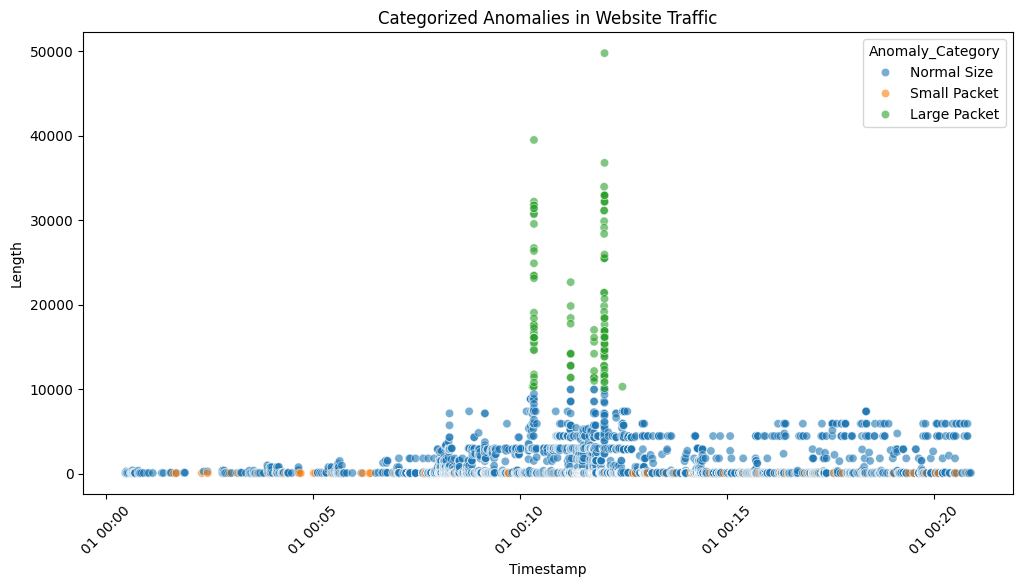

Anomaly_Category
Normal Size     9790
Large Packet     160
Small Packet      94
Name: count, dtype: int64
Protocol_Category
Other    9849
ARP       178
TCP         9
ICMP        8
Name: count, dtype: int64
Source_Category
Bot Suspect    8963
Normal         1081
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df2 = pd.read_csv("anomalies_dataset.csv")

# Convert Time column to datetime
df2['Timestamp'] = pd.to_datetime(df2['Time'], unit='s')

# Feature Selection - Keep relevant numerical features
features = ['Length']
if 'Time_Difference' in df2.columns:
    features.append('Time_Difference')

# Encode categorical features
categorical_cols = ['Source', 'Destination', 'Protocol']
for col in categorical_cols:
    if col in df2.columns:
        df2[col] = LabelEncoder().fit_transform(df2[col])
        features.append(col)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df2[features])

# Train One-Class SVM model
svm_model = OneClassSVM(kernel='rbf', gamma='auto', nu=0.01)
svm_model.fit(X)

# Predict anomalies
df2['Anomaly'] = svm_model.predict(X)
df2['Anomaly'] = df2['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Save outliers
outliers = df2[df2['Anomaly'] == 1]
outliers.to_csv("outliers_detected.csv", index=False)
print(f"Saved {len(outliers)} outliers to outliers_detected.csv")

# --- CATEGORIZATION --- #

# Categorize based on Length
def categorize_length(length):
    if length > 10000:
        return "Large Packet"
    elif length < 50:
        return "Small Packet"
    else:
        return "Normal Size"

outliers["Anomaly_Category"] = outliers["Length"].apply(categorize_length)

# Categorize based on Protocol
protocol_mapping = {
    6: "TCP",
    17: "UDP",
    1: "ICMP",
    9: "ARP",
    303: "Unknown/Custom"
}
outliers["Protocol_Category"] = outliers["Protocol"].map(protocol_mapping).fillna("Other")

# Categorize based on Request Frequency
outliers["Request_Frequency"] = outliers["Source"].map(outliers["Source"].value_counts())
outliers["Source_Category"] = outliers["Request_Frequency"].apply(lambda x: "Bot Suspect" if x > 100 else "Normal")

# Save categorized outliers
outliers.to_csv("categorized_outliers.csv", index=False)
print("Categorized anomalies saved to categorized_outliers.csv")

# --- VISUALIZATION --- #
plt.figure(figsize=(12, 6))
sns.scatterplot(x=outliers['Timestamp'], y=outliers['Length'], hue=outliers['Anomaly_Category'], alpha=0.6)
plt.xlabel('Timestamp')
plt.ylabel('Length')
plt.title('Categorized Anomalies in Website Traffic')
plt.xticks(rotation=45)
plt.show()

# Print category summary
print(outliers["Anomaly_Category"].value_counts())
print(outliers["Protocol_Category"].value_counts())
print(outliers["Source_Category"].value_counts())

In [ ]:
print(df2.columns)  # Check if 'Anomaly_Category', 'Protocol_Category', 'Source_Category' are present

Index(['Time', 'Source', 'No.', 'Destination', 'Protocol', 'Length', 'Info'], dtype='object')


In [ ]:
anomaly_percentage = df2["Anomaly"].mean() * 100
print(f"Detected {anomaly_percentage:.2f}% of traffic as anomalies.")


Detected 2.55% of traffic as anomalies.


In [ ]:
##knn (bad performance)

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score

# Train KNN-based anomaly detector
knn_model = LocalOutlierFactor(n_neighbors=20, contamination=0.02)  # Adjust contamination rate
df2["Anomaly_KNN"] = knn_model.fit_predict(X)
df2["Anomaly_KNN"] = df2["Anomaly_KNN"].apply(lambda x: 1 if x == -1 else 0)

# Compute Silhouette Score for KNN
if df2["Anomaly_KNN"].nunique() > 1:
    knn_sil_score = silhouette_score(X, df2["Anomaly_KNN"])
    print(f"KNN Silhouette Score: {knn_sil_score:.4f}")
else:
    print("Silhouette Score cannot be calculated with only one cluster.")

/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


KNN Silhouette Score: 0.1215


In [ ]:
##

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score

# Load dataset
df2 = pd.read_csv("anomalies_dataset.csv")

# Feature Selection - Keep relevant numerical features
features = ['Length']
if 'Time_Difference' in df2.columns:
    features.append('Time_Difference')

# Encode categorical features
categorical_cols = ['Source', 'Destination', 'Protocol']
for col in categorical_cols:
    if col in df2.columns:
        df2[col] = LabelEncoder().fit_transform(df2[col])
        features.append(col)

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(df2[features])

# Use 50% of data for faster execution
df_sampled = df2.sample(frac=0.5, random_state=42)
X_sampled = scaler.fit_transform(df_sampled[features])

# Train One-Class SVM
svm_model = OneClassSVM(kernel="rbf", gamma="scale", nu=0.05)
svm_model.fit(X_sampled)

# Predict anomalies
df_sampled["Anomaly"] = svm_model.predict(X_sampled)
df_sampled["Anomaly"] = df_sampled["Anomaly"].apply(lambda x: 1 if x == -1 else 0)

# Compute SVM Silhouette Score
svm_sil_score = silhouette_score(X_sampled, df_sampled["Anomaly"])
print(f"SVM Silhouette Score: {svm_sil_score:.4f}")

# Train KNN (Local Outlier Factor)
knn_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df_sampled["Anomaly_KNN"] = knn_model.fit_predict(X_sampled)
df_sampled["Anomaly_KNN"] = df_sampled["Anomaly_KNN"].apply(lambda x: 1 if x == -1 else 0)

# Compute KNN Silhouette Score
if df_sampled["Anomaly_KNN"].nunique() > 1:
    knn_sil_score = silhouette_score(X_sampled, df_sampled["Anomaly_KNN"])
    print(f"KNN Silhouette Score: {knn_sil_score:.4f}")
else:
    print("KNN Silhouette Score: Unable to compute (only one cluster detected).")

# Categorization - Rule-Based Filtering
df_sampled["Request_Frequency"] = df_sampled["Source"].map(df_sampled["Source"].value_counts())
df_sampled["Bot_Suspect"] = df_sampled["Request_Frequency"].apply(lambda x: 1 if x > 100 else 0)
df_sampled["Refined_Anomaly"] = df_sampled.apply(lambda x: 1 if x["Anomaly"] == 1 and x["Length"] > 100 else 0, axis=1)

# Save categorized anomalies
df_sampled[["Source", "Destination", "Protocol", "Length", "Anomaly", "Bot_Suspect"]].to_csv("final_anomalies_report.csv", index=False)

print("Final anomalies report saved as 'final_anomalies_report.csv'")

SVM Silhouette Score: 0.3160


/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_lof.py:322: UserWarning: Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.
  warnings.warn(


KNN Silhouette Score: 0.1702
Final anomalies report saved as 'final_anomalies_report.csv'


In [ ]:
import os

# List files in Colab directory
print(os.listdir())


['.config', 'categorized_outliers.csv', 'final_anomalies_report.csv', 'anomalies_dataset.csv', 'fraud_dataset.csv', 'outliers_detected.csv', 'sample_data']


In [ ]:
from google.colab import files
files.download("final_anomalies_report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Categorizing Length
def categorize_length(length):
    if length > 1000:
        return "Large Packet"
    elif length < 50:
        return "Small Packet"
    else:
        return "Normal Size"

df2["Anomaly_Category"] = df2["Length"].apply(categorize_length)

# Categorizing Protocol
protocol_mapping = {1: "ICMP", 6: "TCP", 17: "UDP", 2054: "ARP"}
df2["Protocol_Category"] = df2["Protocol"].map(protocol_mapping).fillna("Other")

# Categorizing Source (Bot Suspect or Normal)
df2["Request_Frequency"] = df2["Source"].map(df2["Source"].value_counts())
df2["Source_Category"] = df2["Request_Frequency"].apply(lambda x: "Bot Suspect" if x > 100 else "Normal")

# Save updated report
df2.to_csv("final_anomalies_report.csv", index=False)

In [ ]:
from google.colab import files
files.download("final_anomalies_report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Ensure these categorization steps are applied before saving
outliers["Anomaly_Category"] = outliers["Length"].apply(categorize_length)
outliers["Protocol_Category"] = outliers["Protocol"].map(protocol_mapping).fillna("Other")
outliers["Request_Frequency"] = outliers["Source"].map(outliers["Source"].value_counts())
outliers["Source_Category"] = outliers["Request_Frequency"].apply(lambda x: "Bot Suspect" if x > 100 else "Normal")

# Save the categorized anomalies
outliers.to_csv("final_anomalies_report.csv", index=False)

In [ ]:
from google.colab import files
files.download("final_anomalies_report.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>